In [ ]:
import stlearn as st
st.settings.set_figure_params(dpi=120)
# Reading data
data = st.Read10X(path="/mnt/wks3/Senlin/Spatial/Spatial_data/Small_spatial/LC-1-2")
# Save raw_count
data.layers["raw_count"] = data.X
# Preprocessing
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
# Keep raw data
data.raw = data
st.pp.scale(data)

/home/dalco/anaconda3/envs/stlearn/lib/python3.8/site-packages/stlearn/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)
/home/dalco/anaconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dalco/anaconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


In [5]:
# Run PCA
st.em.run_pca(data,n_comps=50,random_state=0)
# Tiling image
st.pp.tiling(data,out_path="/mnt/wks3/Senlin/Spatial/Spatial_data/Small_spatial/tiling",crop_size = 40)
# Using Deep Learning to extract feature
st.pp.extract_feature(data)
# Apply stSME spatial-PCA option
st.spatial.morphology.adjust(data,use_data="X_pca",radius=50,method="mean")
st.pp.neighbors(data,n_neighbors=25,use_rep='X_pca_morphology',random_state=0)
st.tl.clustering.louvain(data,resolution=0.4,random_state=0)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]  


The morphology feature is added to adata.obsm['X_morphology']!


Adjusting data: 100%|██████████ [ time left: 00:00 ]


The data adjusted by morphology is added to adata.obsm['X_pca_morphology']


/home/dalco/anaconda3/envs/stlearn/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dalco/anaconda3/envs/stlearn/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain cluster ...
Louvain cluster is done! The labels are stored in adata.obs['louvain']


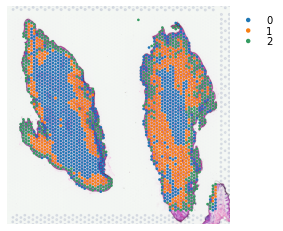

In [6]:
st.pl.cluster_plot(data,use_label="louvain",image_alpha=1,size=7)



In [ ]:
st.add.annotation(data,label_list=['Fatty tissue,immune/lymphoid 1 MALAT1+',
                                   'Invasive cancer,fibrous tissue 1 CXCL14+',
                                   'Invasive cancer,fibrous tissue 2 CRISP3+',
                                   'Invasive cancer,fibrous tissue, fatty tissue',
                                   'Fatty tissue,immune/lymphoid 2 IGKC+',
                                   'Fibrous tissue',
                                   'Invasive cancer,fibrous tissue (DCIS)',
                                   'Fatty tissue, Fibrous tissue',
                                   'Invasive cancer,immune/lymphoid (IDC)' ,
                                   'Invasive cancer,fatty tissue 3 MUC5B+',
                                   'Fatty tissue'],
                 use_label="louvain")
st.pl.cluster_plot(data,use_label="louvain_anno",image_alpha=1,size=7)

In [7]:
data.uns["iroot"] = st.spatial.trajectory.set_root(data,use_label="louvain",cluster=1,use_raw=True)
st.spatial.trajectory.pseudotime(data,eps=50,use_rep="X_pca",use_label="louvain")

All available trajectory paths are stored in adata.uns['available_paths'] with length < 4 nodes


In [8]:
st.spatial.trajectory.pseudotimespace_global(data,use_label="louvain",list_clusters=["1",'2'])

Start to construct the trajectory: 1 -> 2


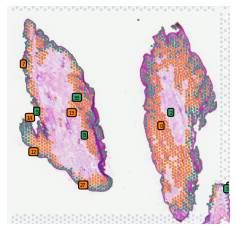

In [9]:
st.pl.cluster_plot(data,use_label="louvain",show_subcluster=True,show_color_bar=False, list_clusters=['1','2'])

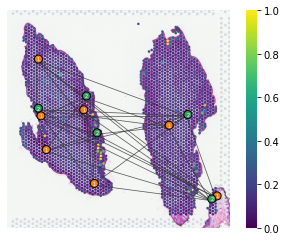

In [12]:
st.pl.trajectory.pseudotime_plot(data, use_label="louvain", pseudotime_key="dpt_pseudotime", list_clusters=['1','2'], show_node=True)

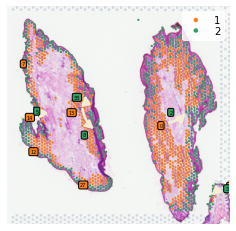

In [14]:
st.pl.cluster_plot(data,use_label="louvain",show_trajectories=True,list_clusters=["1",'2'],show_subcluster=True)


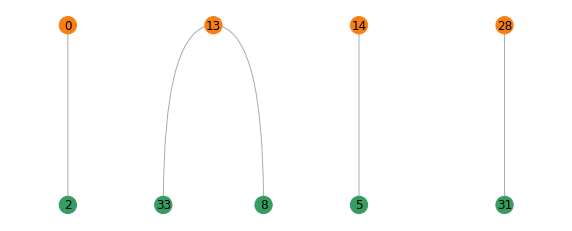

In [15]:
st.pl.trajectory.tree_plot(data)

In [45]:


st.spatial.trajectory.detect_transition_markers_clades(data,clade=0,use_raw_count=False,cutoff_spearman=0.4)



Detecting the transition markers of clade_0...
Transition markers result is stored in adata.uns['clade_0']


In [58]:
st.spatial.trajectory.detect_transition_markers_clades(data,clade=13,use_raw_count=False,cutoff_spearman=0.4)

Detecting the transition markers of clade_13...
Transition markers result is stored in adata.uns['clade_13']


In [47]:
st.spatial.trajectory.detect_transition_markers_clades(data,clade=28,use_raw_count=False,cutoff_spearman=0.4)

Detecting the transition markers of clade_28...
Transition markers result is stored in adata.uns['clade_28']


In [59]:
data.uns['clade_0'] = data.uns['clade_0'][data.uns['clade_0']['gene'].map(lambda x: "RPL"  not in x)]
data.uns['clade_13'] = data.uns['clade_13'][data.uns['clade_13']['gene'].map(lambda x: "RPL" not in x)]
data.uns['clade_28'] = data.uns['clade_28'][data.uns['clade_28']['gene'].map(lambda x: "RPL" not in x)]
data.uns['clade_0'] = data.uns['clade_0'][data.uns['clade_0']['gene'].map(lambda x: "RPS" not in x)]
data.uns['clade_13'] = data.uns['clade_13'][data.uns['clade_13']['gene'].map(lambda x: "RPS" not in x)]
data.uns['clade_28'] = data.uns['clade_28'][data.uns['clade_28']['gene'].map(lambda x: "RPS" not in x)]

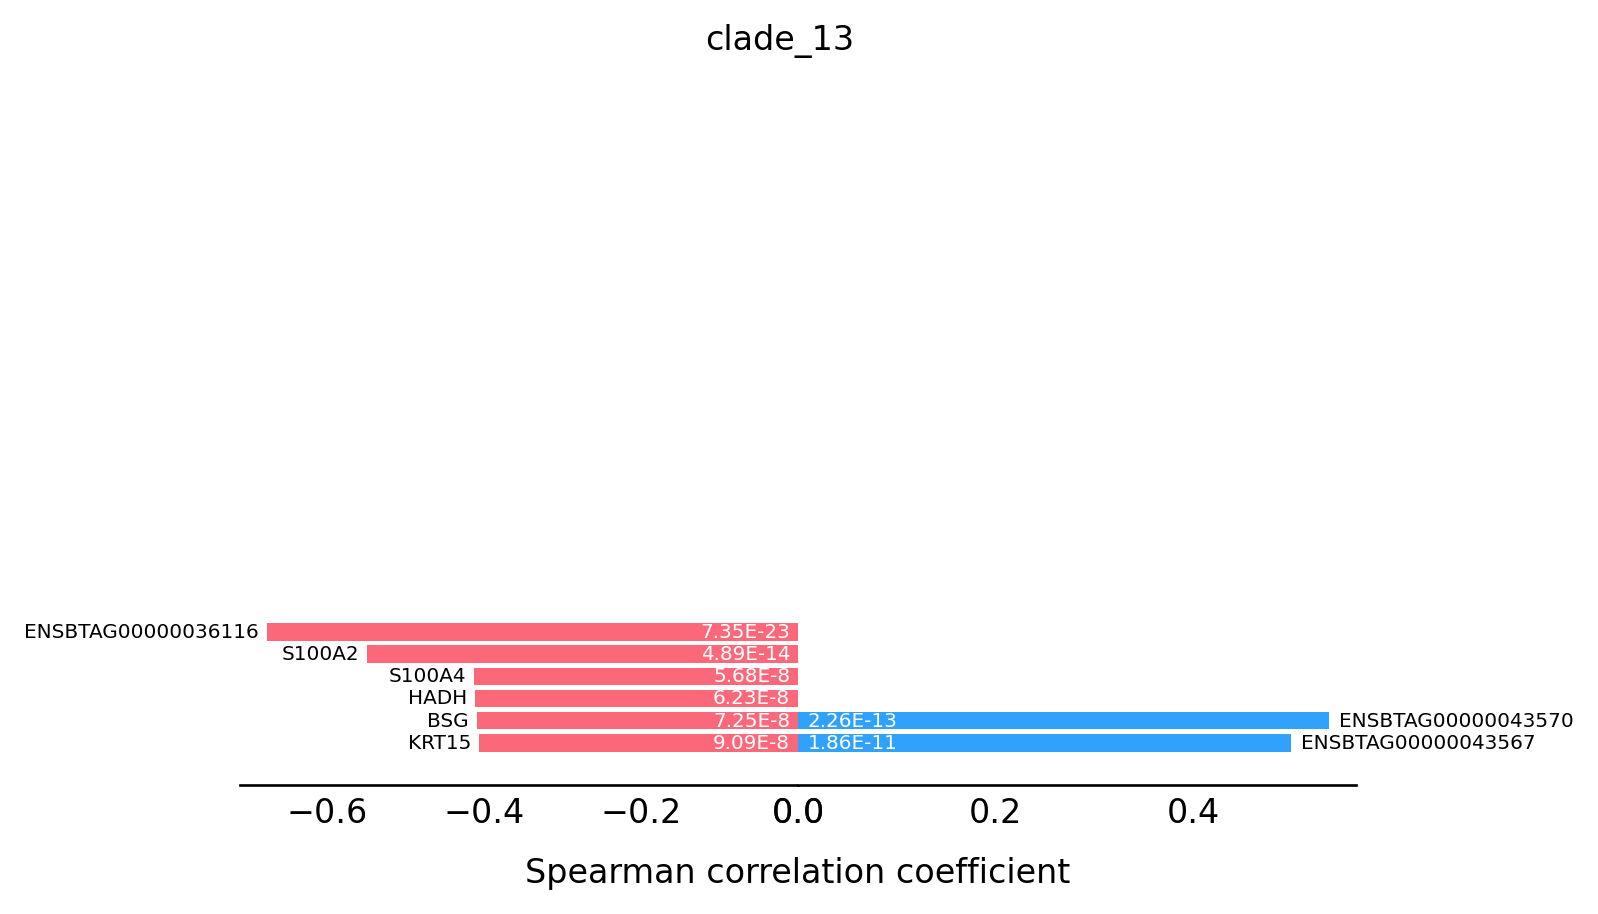

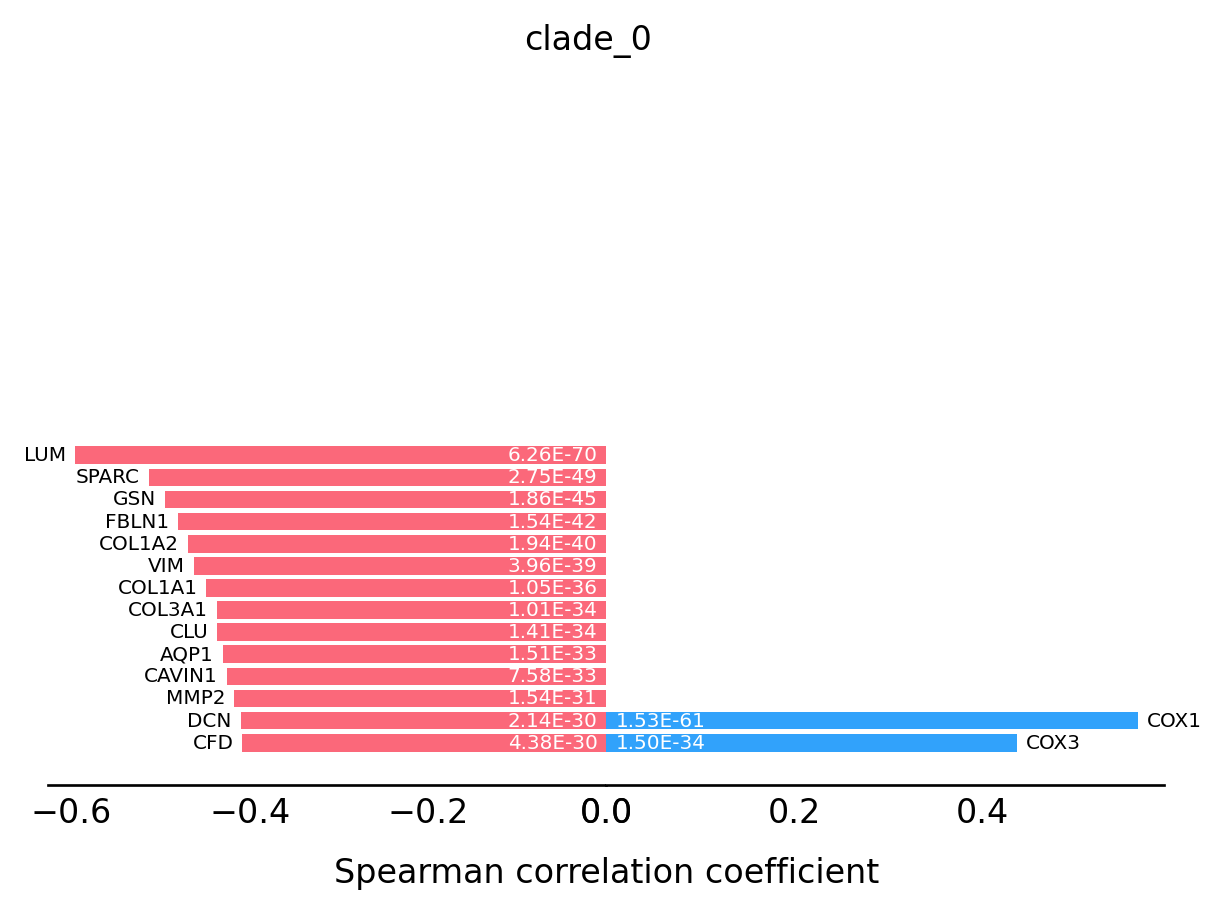

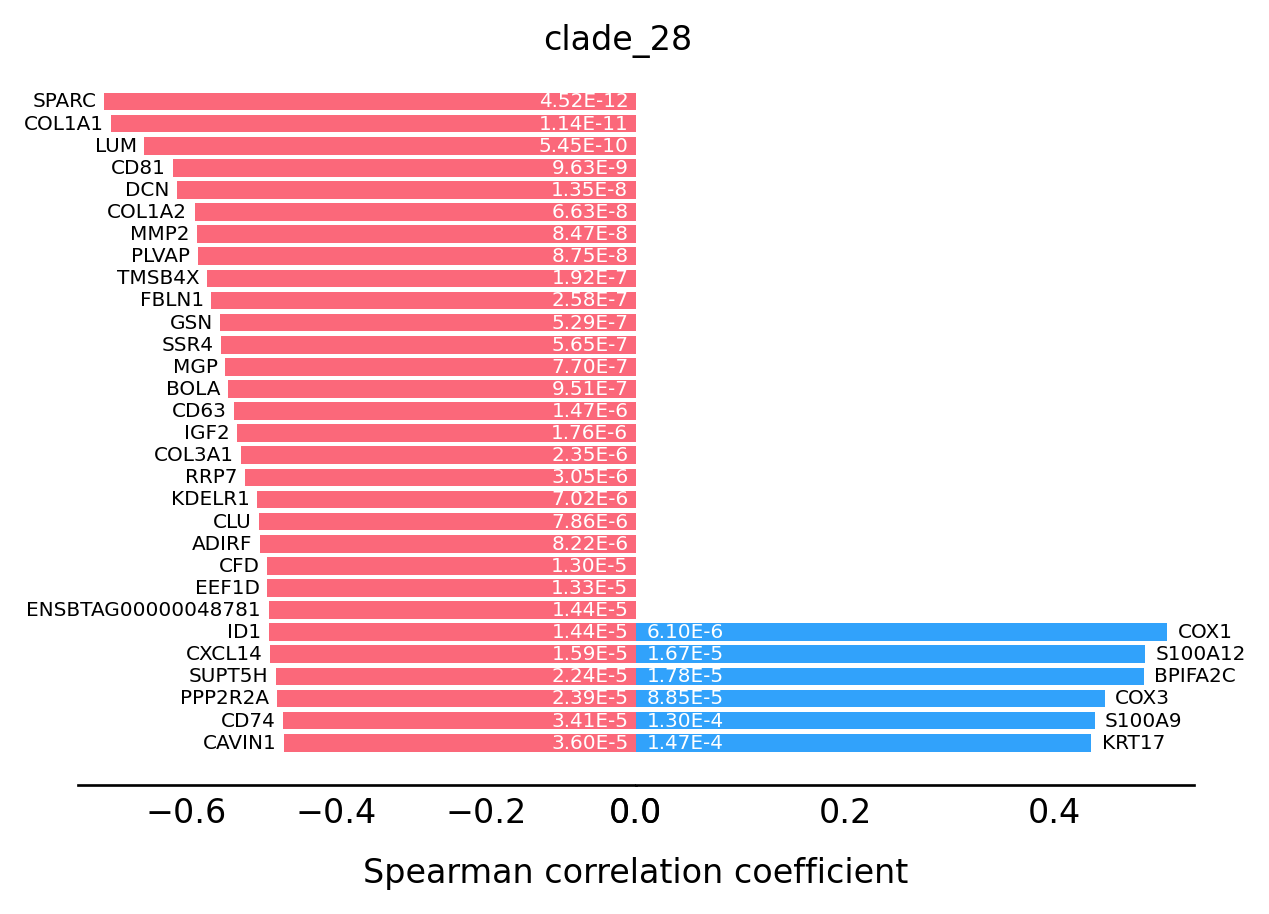

In [60]:
st.pl.trajectory.transition_markers_plot(data,top_genes=30,trajectory="clade_13")

st.pl.trajectory.transition_markers_plot(data,top_genes=30,trajectory="clade_0")

st.pl.trajectory.transition_markers_plot(data,top_genes=30,trajectory="clade_28")
